In [ ]:
#imprt packages
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import StratifiedShuffleSplit

#import dataset
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
# WikiHow = pd.read_csv('/content/gdrive/MyDrive/SNLP_Coursework/wikihowAll.csv')
# WikiHow = pd.read_csv('/content/gdrive/MyDrive/SNLP_Coursework/WikiHow_withlength.csv')

WikiHow = pd.read_csv('/content/gdrive/MyDrive/SNLP_Coursework/wikihowAll.csv')

#clean dataset
#Some questions do not have text so the column 'text' is NaN
#Replace these with ''
WikiHow.fillna('', inplace=True)

# galance of dataframe
WikiHow.head()

Mounted at /content/gdrive


,headline,title,text
0,"\nKeep related supplies in the same area.,\nMa...",How to Be an Organized Artist1,"If you're a photographer, keep all the necess..."
1,\nCreate a sketch in the NeoPopRealist manner ...,How to Create a Neopoprealist Art Work,See the image for how this drawing develops s...
2,"\nGet a bachelor’s degree.,\nEnroll in a studi...",How to Be a Visual Effects Artist1,It is possible to become a VFX artist without...
3,\nStart with some experience or interest in ar...,How to Become an Art Investor,The best art investors do their research on t...
4,"\nKeep your reference materials, sketches, art...",How to Be an Organized Artist2,"As you start planning for a project or work, ..."


In [ ]:
# galance of dataframe
WikiHow.head()

In [ ]:
#generate a column storing the length of each passage
WikiHow['text_length'] = 'empty'
for i, text in enumerate(WikiHow['text']):

  print(i, len(text))
  WikiHow['text_length'][i] = len(text.split())

0 3425
1 3665
2 2746
3 5140
4 2604
5 3132
6 2559
7 2069
8 2516
9 2981
10 570
11 659
12 7217
13 762
14 1688
15 19274
16 1648
17 550
18 561
19 324
20 825
21 5766
22 10456
23 15656
24 2570
25 1234
26 7337
27 2089
28 1831
29 10121
30 852
31 5770
32 8454
33 1542
34 2783
35 2368
36 1743
37 1492
38 9399
39 674
40 4048
41 8177
42 1832
43 344
44 8214
45 3945
46 1191
47 1627
48 9871
49 16204
50 4746
51 12071
52 3241
53 6816
54 1682
55 7553
56 5795
57 1973
58 2358
59 2710
60 1775
61 8160
62 2039
63 3271
64 3297
65 11192
66 7672
67 4505
68 1397
69 1018
70 2457
71 381
72 4577
73 3013
74 1753
75 1562
76 1339
77 3499
78 1258
79 1745
80 1117
81 722
82 2891
83 1084
84 2623
85 1319
86 2036
87 2360
88 1461
89 3905
90 5899
91 3606
92 3320
93 2339
94 1929
95 2268
96 2538
97 75
98 2217
99 2173
100 2398
101 1976
102 1344
103 10352
104 985
105 4371
106 653
107 314
108 7247
109 7405
110 474
111 223
112 907
113 1338
114 1788
115 2760
116 1419
117 3403
118 2678
119 907
120 3529
121 5311
122 2904
123 1273
124 141

TypeError: ignored

In [ ]:
#save the dataset with passage length
WikiHow.to_csv('WikiHow_withlength.csv')
!cp WikiHow_withlength.csv "/content/gdrive/My Drive/SNLP_Coursework"

In [ ]:
#reomove passages with length less than 30 and passages length that only appear once
WikiHow_removed = WikiHow[WikiHow['text_length']>30][WikiHow[WikiHow['text_length']>30].duplicated(subset=["text_length"], keep=False)]

TypeError: ignored

In [ ]:
# WikiHow_leq512 = WikiHow[WikiHow['text_length'] < 512]

# WikiHow_leq512.to_csv('WikiHow_leq512.csv')
# !cp WikiHow_leq512.csv "/content/gdrive/My Drive/SNLP_Coursework"

In [ ]:
#apply stratified sampling to the dataset
N = round(len(WikiHow_removed)/2)
WikiHow_sample = WikiHow_removed.groupby('text_length', group_keys=False).apply(lambda x: x.sample(int(np.rint(N*len(x)/len(WikiHow_removed))))).sample(frac=1).reset_index(drop=True)

WikiHow_sample.to_csv('WikiHow_sample.csv')
!cp WikiHow_sample.csv "/content/gdrive/My Drive/SNLP_Coursework"

In [ ]:
WikiHow_sample_leq512 = WikiHow_sample[WikiHow_sample['text_length'] <512 ]

WikiHow_sample_leq512.to_csv('WikiHow_sample_leq512.csv')
!cp WikiHow_sample_leq512.csv "/content/gdrive/My Drive/SNLP_Coursework"

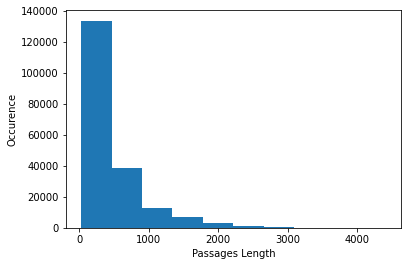

In [ ]:
#plot the distribution of our test dataset
plt.hist(WikiHow_removed['text_length'])
plt.xlabel('Passages Length')
plt.ylabel('Occurence')
plt.plot()
plt.savefig('sample_distribution.png')